In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("D:\\shru\\Sem 5\\ML\\files\\diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
percnan=pd.DataFrame([(col,df[col].isna().mean()*100)for col in df],columns=["Features","percentage"])

In [7]:
percnan

,Features,percentage
0,Pregnancies,0.0
1,Glucose,0.0
2,BloodPressure,0.0
3,SkinThickness,0.0
4,Insulin,0.0
5,BMI,0.0
6,DiabetesPedigreeFunction,0.0
7,Age,0.0
8,Outcome,0.0


In [22]:
X=df.drop(['Outcome'],axis=1)
Y=df["Outcome"]

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [54]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X,Y);

C:\Users\91913\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
y_predict=reg.predict(X_test)

In [56]:
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [57]:
acc=mean_squared_error(y_test,y_predict,)
acc

0.18181818181818182

In [58]:
reg.score(X_train,y_train)

0.7736156351791531

In [59]:
from sklearn.metrics import confusion_matrix,classification_report

In [60]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



In [61]:
cf=confusion_matrix(y_test,y_predict)
cf

array([[98,  9],
       [19, 28]], dtype=int64)

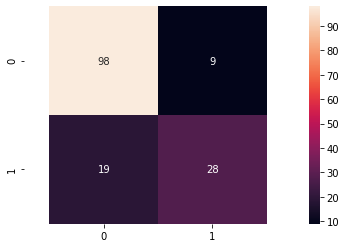

In [62]:
sns.heatmap(cf,annot=True)
plt.axis('equal')
plt.show()

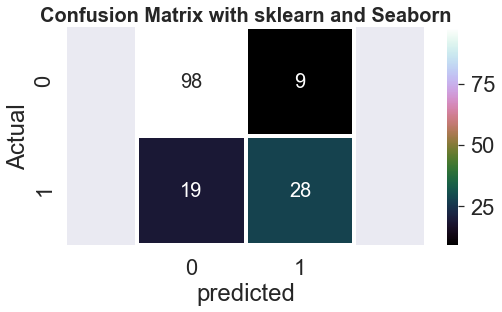

In [63]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(8,4))
    sns.set(font_scale=2)
    sns.heatmap(cf,annot=True,square=True,annot_kws={"size":20},linewidth=3,cmap='cubehelix')
    plt.xlabel('predicted');
    plt.ylabel('Actual')
    plt.axis('equal');
    plt.title('Confusion Matrix with sklearn and Seaborn',fontweight='bold',fontsize=20)
    plt.show()